# MOT beam balancing with fluorescence

In [16]:
import numpy as np
from matplotlib import pyplot as plt
import h5py
from PIL import Image # for image manipulation e.g. rotation
from scipy.ndimage import rotate
import os
import csv
import tifffile  # to load tiff files efficiently
import cv2 # Open-CV for selecting a ROI
import itertools #to flatten a list of list
from scipy.optimize import curve_fit
import scipy.ndimage as ndi
import datetime
from datetime import datetime as dt
from datetime import time
results = "..\\artiq_results\\"

## 2024.01.26 - data with box opened and heatgun applied
- frame 20: box opened
- frame 40: start heat applied to the fiber inputs to AOMs
- frame 56: stop "
- frame 72: stop heat applied to the fiber outputs to AOMs
- frame 88: stop "
- box left open until the end of data collection

### get MOT position from ThorCam images

In [181]:
imdir = "2024-01-26\\ThorCam_images_1432"

thor_filenames = [f for f in next(os.walk(imdir),
                    (None, None, []))[2] if f[-3:]=='bmp']  # [] if no file

n_files = len(thor_filenames)

# get the dimensions
f = os.path.join(imdir,thor_filenames[0])
im = np.array(Image.open(f).convert('L'))
rows, cols = im.shape
xpts = range(cols)
ypts = range(rows)

xmax_list = []
ymax_list = []
xstd_list = []
ystd_list = []

motx_slices = np.zeros((cols,n_files))
moty_slices = np.zeros((rows,n_files))

for i in range(n_files):

    try:
        # raw_im = np.array(Image.open(os.path.join(imdir,thor_filenames[i])).convert('L'))
         # im = ndi.gaussian_filter(raw_im,5)
        im = np.array(Image.open(os.path.join(imdir,thor_filenames[i])).convert('L')) 

        motx = ndi.gaussian_filter(np.sum(im, axis=0).astype(float), 10)
        motx_slices[:,i] = motx
        # motx -= np.amin(motx)
        # motx /= np.amax(motx)
        # xmax = np.argmax(motx)
        # xmax_list.append(xmax)
        # xstd_list.append(np.std(motx))
    
        moty = ndi.gaussian_filter(np.sum(im, axis=1).astype(float), 10)
        moty_slices[:,i] = moty
        # moty -= np.amin(moty)
        # moty /= np.amax(moty)
        # ymax = np.argmax(moty)
        # ymax_list.append(ymax)
        # ystd_list.append(np.std(moty))
    
    except Exception as e:
        print(e)
    
        # mean_im += im

    # # mean_im_list.append(mean_im/(measurement+1)) # if we skipped an image, the average is still correctly normalized

    # plt.title(f"experiment iteration {i}")
    # ax=plt.imshow(mean_im_list[-1])
    # plt.colorbar(ax)
    # plt.show()

# xmax_list=np.array(xmax_list)
# ymax_list=np.array(ymax_list)
# xstd_list=np.array(xstd_list)
# ystd_list=np.array(ystd_list)

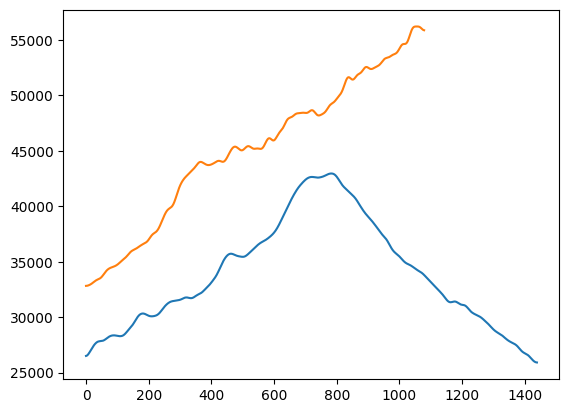

In [182]:
plt.plot(motx)
plt.plot(moty)

In [ ]:
plt.plot(xmax_list)
plt.plot(ymax_list)

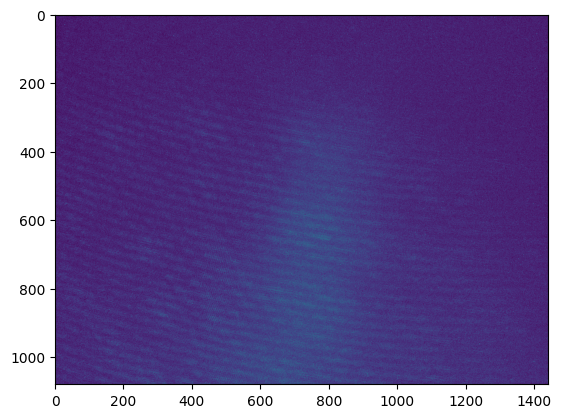

In [13]:
plt.imshow(im)

### get ROIs for scattering before and after polarizers from Luca image

In [183]:
filename = "2024-01-26\\CheckMOTBalance20240126_1432.tif"

imstack = tifffile.imread(filename)
n_img = round(len(imstack)/5) ### number of images for each AOM.

# averaged images
alloff = np.mean([imstack[0+5*i] for i in range(n_img)],axis=0)
mot1 = np.mean([imstack[1+5*i] for i in range(n_img)],axis=0)
mot2 = np.mean([imstack[2+5*i] for i in range(n_img)],axis=0)
mot3 = np.mean([imstack[3+5*i] for i in range(n_img)],axis=0)
mot4 = np.mean([imstack[4+5*i] for i in range(n_img)],axis=0)

mot1_arr = np.array([imstack[1+5*i] for i in range(n_img)])
mot2_arr = np.array([imstack[2+5*i] for i in range(n_img)])
mot3_arr = np.array([imstack[3+5*i] for i in range(n_img)])
mot4_arr = np.array([imstack[4+5*i] for i in range(n_img)])

imstack2 = [mot1,mot2,mot3,mot4]

before polarizers

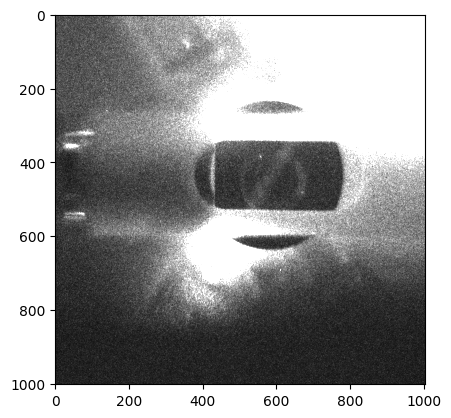

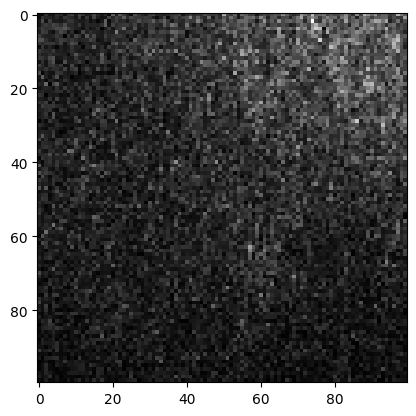

In [127]:
plt.imshow(mot1_arr[0], cmap='grey',vmax=950)
plt.show()
plt.imshow(mot1_arr[0,750:850,300:400], cmap='grey')

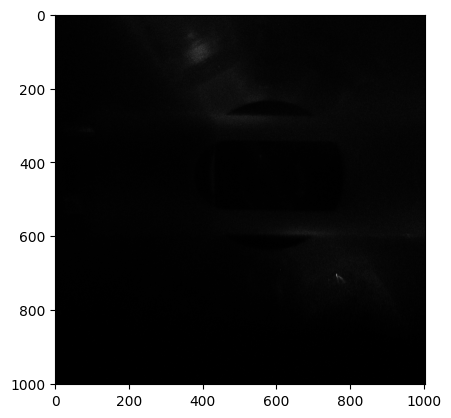

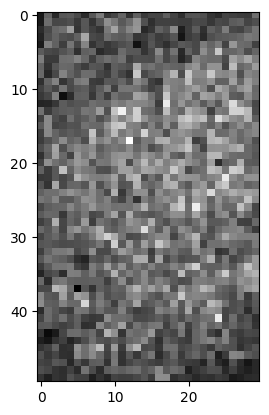

In [134]:
plt.imshow(mot2_arr[0], cmap='grey')#, vmax=950)
plt.show()
plt.imshow(mot2_arr[0,80:130,370:400], cmap='grey')

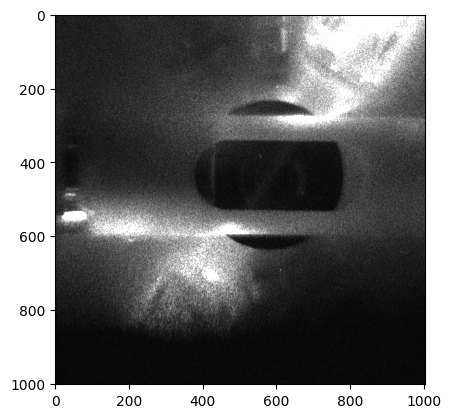

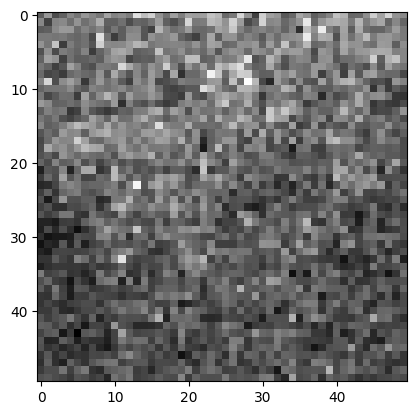

In [141]:
plt.imshow(mot3_arr[0], cmap='grey',vmax=1900)
plt.show()
plt.imshow(mot3_arr[0,80:130,750:800], cmap='grey')

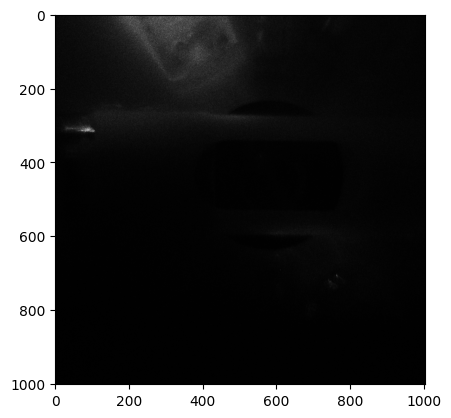

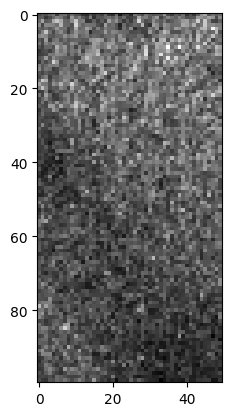

In [147]:
plt.imshow(mot4_arr[0], cmap='grey')
plt.show()
plt.imshow(mot4_arr[0,:100,250:300], cmap='grey')

after polarizers

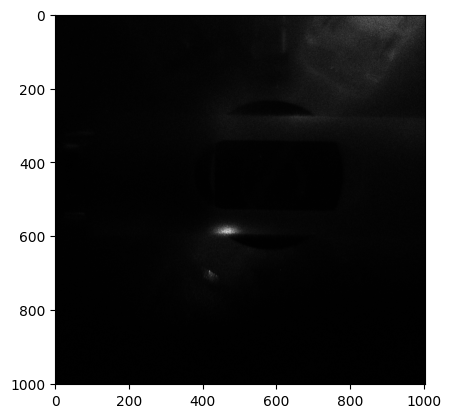

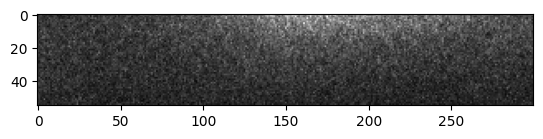

In [70]:
plt.imshow(mot1_arr[0], cmap='grey')
plt.show()
plt.imshow(mot1_arr[0,280:335,500:800], cmap='grey')

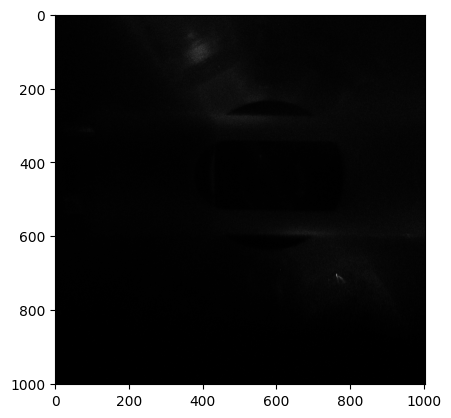

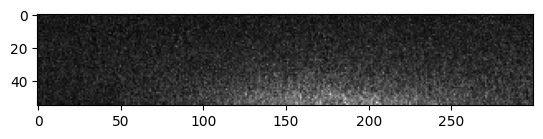

In [84]:
plt.imshow(mot2_arr[0], cmap='grey')
plt.show()
plt.imshow(mot2_arr[0,540:595,500:800], cmap='grey')

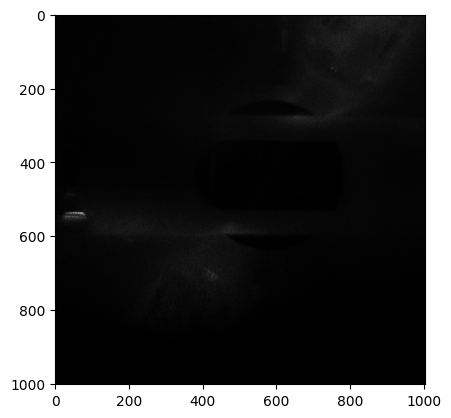

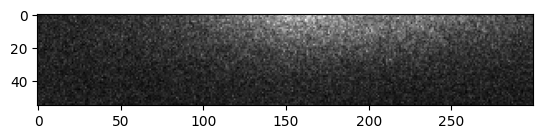

In [85]:
plt.imshow(mot3_arr[0], cmap='grey')
plt.show()
plt.imshow(mot3_arr[0,280:335,500:800], cmap='grey')

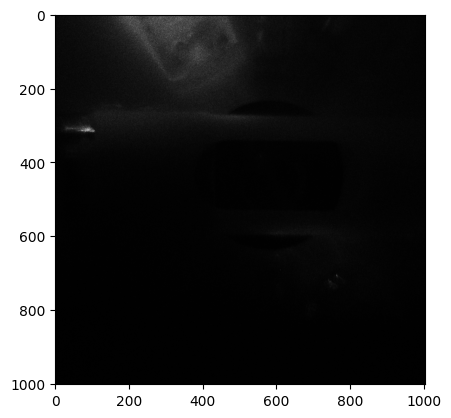

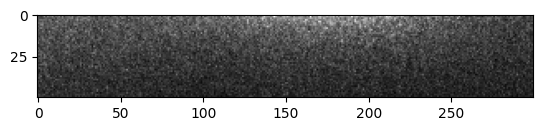

In [99]:
plt.imshow(mot4_arr[0], cmap='grey')
plt.show()
plt.imshow(mot4_arr[0,280:330,300:600], cmap='grey')

In [ ]:
280:335,500:800

In [192]:
xx=np.array([[1,2,3,4],[3,4,5,6],[5,6,7,8]])
xr = (1,3)
yr = (0,2)
xx[slice(*yr),slice(*xr)]
xx[slice(*yr),slice(*xr)]

array([[2, 3],
       [4, 5]])

In [190]:
xx

array([[1, 2, 3, 4],
       [3, 4, 5, 6],
       [5, 6, 7, 8]])

In [191]:
xx[0:1]

array([[1, 2, 3, 4]])

### compare MOT position and ROI scattering

In [184]:
# mot1_scatter = np.sum(mot1_arr[:,280:335,500:800],axis=(1,2))
# mot2_scatter = np.sum(mot1_arr[:,540:595,500:800],axis=(1,2))
# mot3_scatter = np.sum(mot1_arr[:,280:335,500:800],axis=(1,2))
# mot4_scatter = np.sum(mot1_arr[:,280:330,300:600],axis=(1,2))

mot1_before_roi = np.sum(mot1_arr[:,750:850,300:400],axis=(1,2))
mot2_before_roi = np.sum(mot2_arr[:,80:130,370:400],axis=(1,2))
mot3_before_roi = np.sum(mot3_arr[:,80:130,750:800],axis=(1,2))
mot4_before_roi = np.sum(mot4_arr[:,:100,250:300],axis=(1,2))

mot1_after_roi = np.sum(mot1_arr[:,280:335,500:800],axis=(1,2))
mot2_after_roi = np.sum(mot2_arr[:,540:595,500:800],axis=(1,2))
mot3_after_roi = np.sum(mot3_arr[:,280:335,500:800],axis=(1,2))
mot4_after_roi = np.sum(mot4_arr[:,280:330,300:600],axis=(1,2))

normalize_to_mean = lambda x: x/np.mean(x)

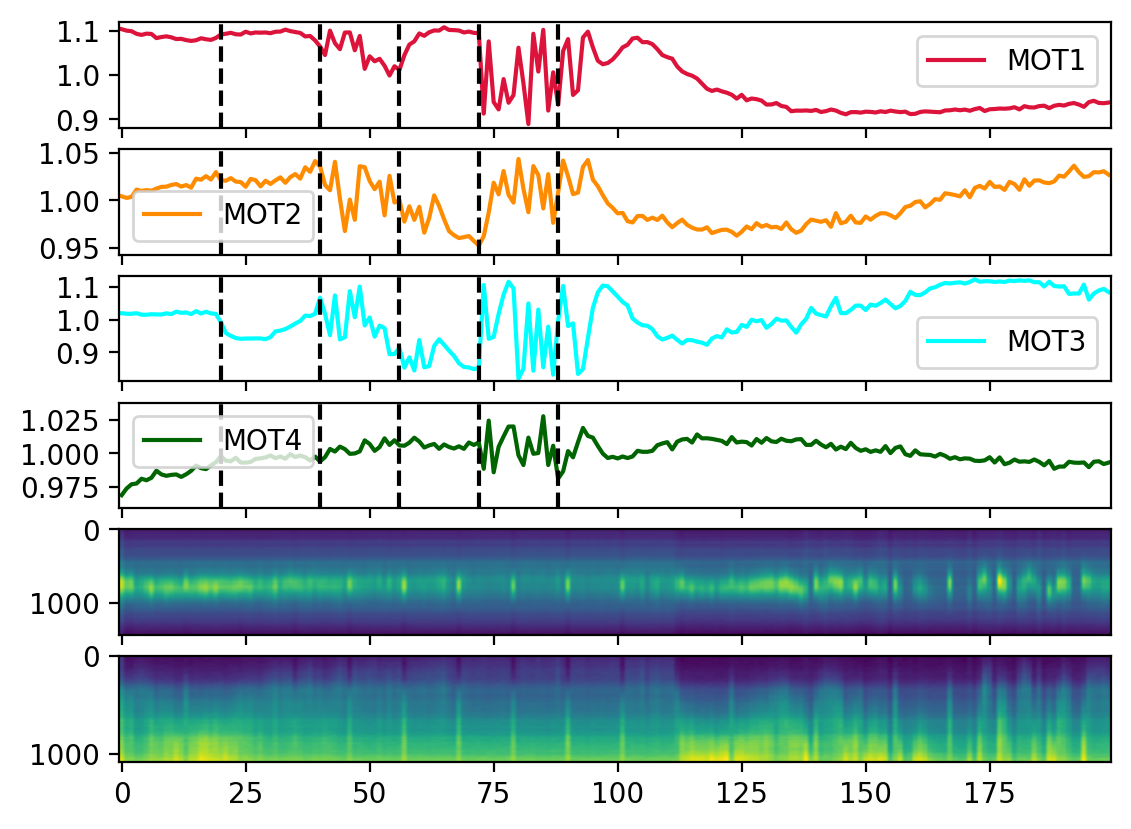

In [187]:
# plotting with each roi normalized to its own mean over all frames

mot1_scatter = normalize_to_mean(mot1_after_roi)/normalize_to_mean(mot1_before_roi)
mot2_scatter = normalize_to_mean(mot2_after_roi)/normalize_to_mean(mot2_before_roi)
mot3_scatter = normalize_to_mean(mot3_after_roi)/normalize_to_mean(mot3_before_roi)
mot4_scatter = normalize_to_mean(mot4_after_roi)/normalize_to_mean(mot4_before_roi)

mot_scatter_list = [mot1_scatter,mot2_scatter,mot3_scatter,mot4_scatter]

fig,axes = plt.subplots(nrows=6,sharex=True,dpi=200)
labels=['MOT1','MOT2','MOT3','MOT4']
colors=['crimson','darkorange','cyan','darkgreen','magenta','blue']
for scatter,lbl,ax,color in zip(mot_scatter_list,labels,axes.flat[:4],colors):
    ax.plot(scatter, label=lbl,color=color)
    ax.set_ylim((.99*min(scatter),1.01*max(scatter)))
axes[4].imshow(motx_slices,label="MOT x")#plot((xmax_list-xmax_list[0])/200, label="MOT x maximum",color=colors[4])
axes[4].set_aspect('auto')
axes[5].imshow(moty_slices,label="MOT y")#plot((ymax_list-ymax_list[0])/1000, label="MOT y maximum",color=colors[5])
axes[5].set_aspect('auto')
for ax in axes[:4]:
    ax.axvline(20,color='black',linestyle='--')
    ax.axvline(40,color='black',linestyle='--')
    ax.axvline(56,color='black',linestyle='--')
    ax.axvline(72,color='black',linestyle='--')
    ax.axvline(88,color='black',linestyle='--')
    ax.legend()

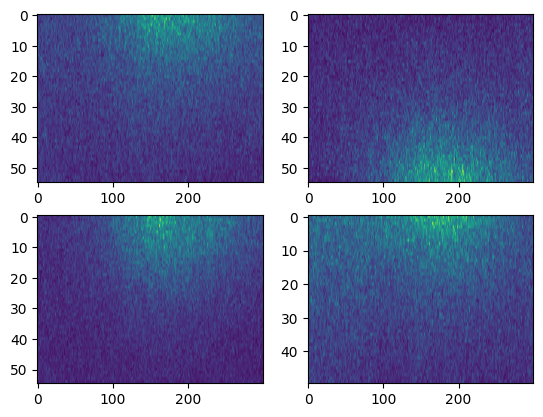

In [194]:
ROI1 = ((280,335), (500,800))
ROI2 = ((540,595), (500,800))
ROI3 = ((280,335), (500,800))
ROI4 = ((280,330), (300,600))

ROIs = [ROI1, ROI2, ROI3, ROI4]
mot_arrs = [mot1_arr,mot2_arr,mot3_arr,mot4_arr]

fig, axes = plt.subplots(nrows=2,ncols=2)

for ax,ROI,mot_arr in zip(axes.flat,ROIs,mot_arrs):
    ROI_rows,ROI_cols = ROI
    ax.imshow(mot_arr[0,slice(*ROI_rows),slice(*ROI_cols)])
    ax.set_aspect('auto')
plt.show()

In [ ]:
plt.imshow(mot_)

## 2024.01.26 - data with Box closed

### get MOT position from ThorCam images

In [167]:
imdir = "2024-01-26\\ThorCam_images_1112"

thor_filenames = [f for f in next(os.walk(imdir), 
                    (None, None, []))[2] if f[-3:]=='bmp']  # [] if no file

n_files = len(thor_filenames)

# get the dimensions
f = os.path.join(imdir,thor_filenames[0])
im = np.array(Image.open(f).convert('L'))
rows, cols = im.shape
xpts = range(cols)
ypts = range(rows)

xmax_list = []
ymax_list = []
xstd_list = []
ystd_list = []

motx_slices = np.zeros((cols,n_files))
moty_slices = np.zeros((rows,n_files))

for i in range(n_files):

    try:
        # raw_im = np.array(Image.open(os.path.join(imdir,thor_filenames[i])).convert('L'))
         # im = ndi.gaussian_filter(raw_im,5)
        im = np.array(Image.open(os.path.join(imdir,thor_filenames[i])).convert('L')) 

        motx = ndi.gaussian_filter(np.sum(im, axis=0).astype(float), 10)
        motx_slices[:,i] = motx
        motx -= np.amin(motx)
        motx /= np.amax(motx)
        xmax = np.argmax(motx)
        xmax_list.append(xmax)
        xstd_list.append(np.std(motx))
    
        moty = ndi.gaussian_filter(np.sum(im, axis=1).astype(float), 10)
        moty_slices[:,i] = moty
        moty -= np.amin(moty)
        moty /= np.amax(moty)
        ymax = np.argmax(moty)
        ymax_list.append(ymax)
        ystd_list.append(np.std(moty))
    
    except Exception as e:
        print(e)
    
        # mean_im += im

    # # mean_im_list.append(mean_im/(measurement+1)) # if we skipped an image, the average is still correctly normalized

    # plt.title(f"experiment iteration {i}")
    # ax=plt.imshow(mean_im_list[-1])
    # plt.colorbar(ax)
    # plt.show()

xmax_list=np.array(xmax_list)
ymax_list=np.array(ymax_list)
xstd_list=np.array(xstd_list)
ystd_list=np.array(ystd_list)

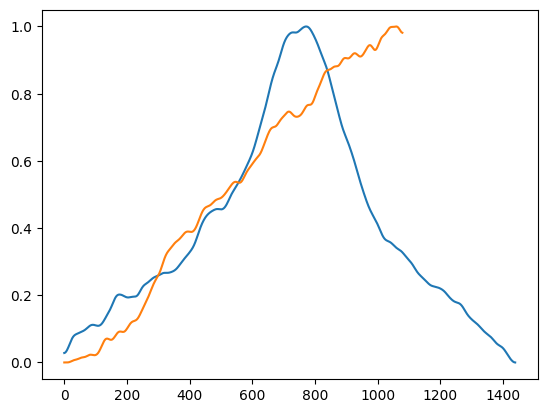

In [48]:
plt.plot(motx)
plt.plot(moty)

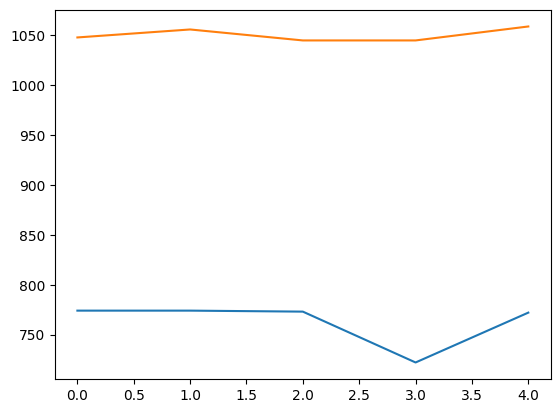

In [40]:
plt.plot(xmax_list)
plt.plot(ymax_list)

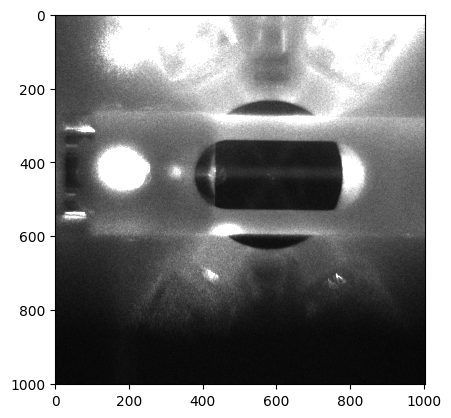

In [208]:
plt.imshow(imstack[5],vmax=4500,cmap='grey')

### get ROIs for scattering before and after polarizers from Luca image

In [60]:
filename = "2024-01-26\\CheckMOTBalance20240126_1112.tif"

imstack = tifffile.imread(filename)
n_img = round(len(imstack)/5) ### number of images for each AOM.

# averaged images
alloff = np.mean([imstack[0+5*i] for i in range(n_img)],axis=0)
mot1 = np.mean([imstack[1+5*i] for i in range(n_img)],axis=0)
mot2 = np.mean([imstack[2+5*i] for i in range(n_img)],axis=0)
mot3 = np.mean([imstack[3+5*i] for i in range(n_img)],axis=0)
mot4 = np.mean([imstack[4+5*i] for i in range(n_img)],axis=0)

mot1_arr = np.array([imstack[1+5*i] for i in range(n_img)])
mot2_arr = np.array([imstack[2+5*i] for i in range(n_img)])
mot3_arr = np.array([imstack[3+5*i] for i in range(n_img)])
mot4_arr = np.array([imstack[4+5*i] for i in range(n_img)])

imstack2 = [mot1,mot2,mot3,mot4]

before polarizers

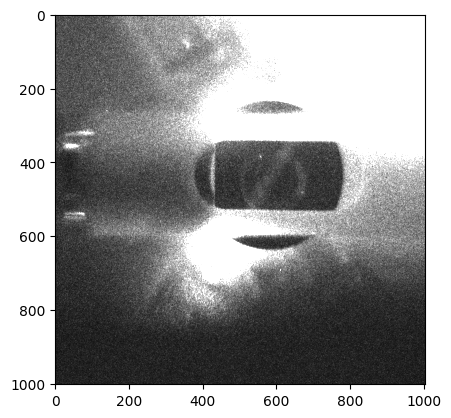

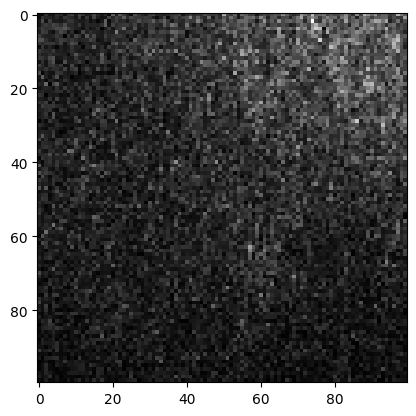

In [127]:
plt.imshow(mot1_arr[0], cmap='grey',vmax=950)
plt.show()
plt.imshow(mot1_arr[0,750:850,300:400], cmap='grey')

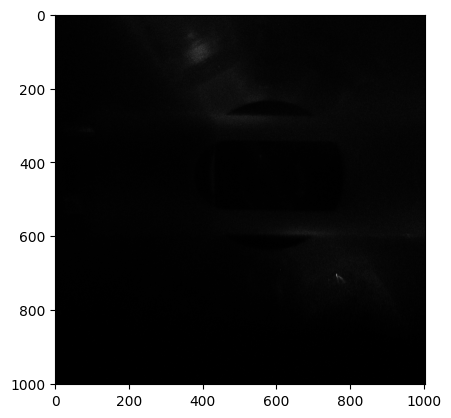

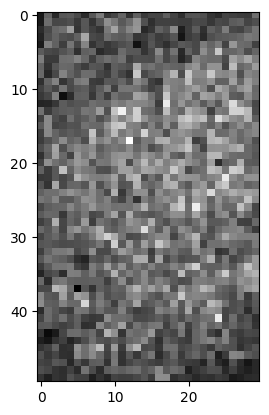

In [134]:
plt.imshow(mot2_arr[0], cmap='grey')#, vmax=950)
plt.show()
plt.imshow(mot2_arr[0,80:130,370:400], cmap='grey')

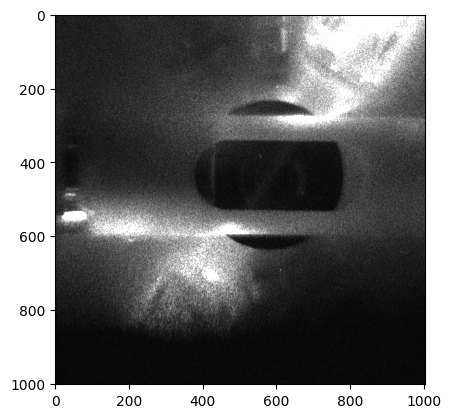

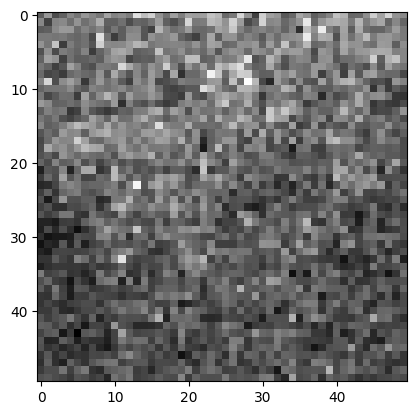

In [141]:
plt.imshow(mot3_arr[0], cmap='grey',vmax=1900)
plt.show()
plt.imshow(mot3_arr[0,80:130,750:800], cmap='grey')

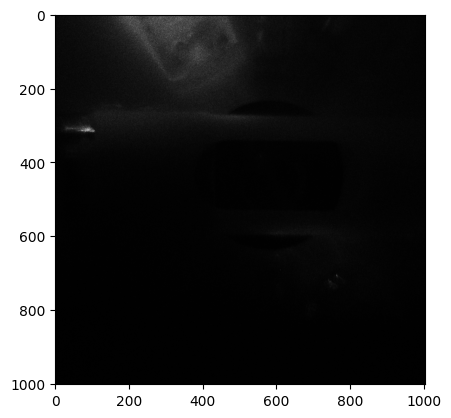

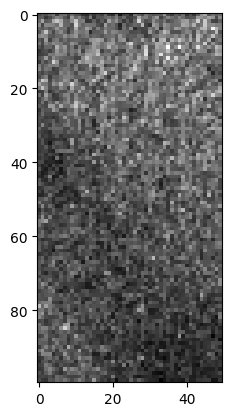

In [147]:
plt.imshow(mot4_arr[0], cmap='grey')
plt.show()
plt.imshow(mot4_arr[0,:100,250:300], cmap='grey')

after polarizers

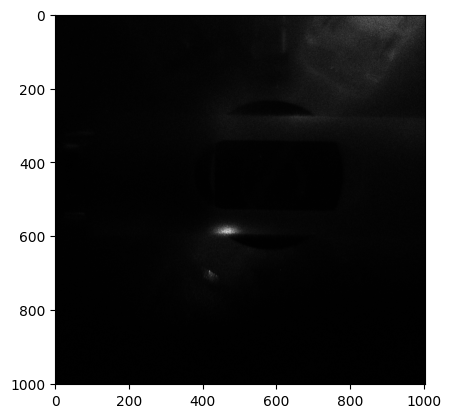

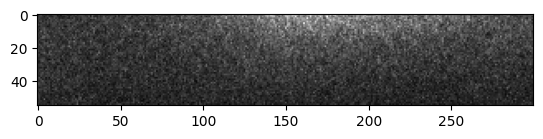

In [70]:
plt.imshow(mot1_arr[0], cmap='grey')
plt.show()
plt.imshow(mot1_arr[0,280:335,500:800], cmap='grey')

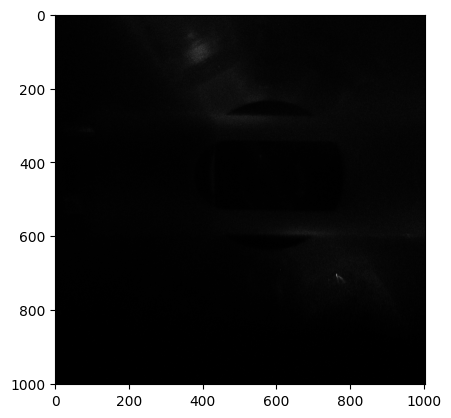

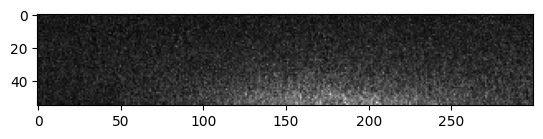

In [84]:
plt.imshow(mot2_arr[0], cmap='grey')
plt.show()
plt.imshow(mot2_arr[0,540:595,500:800], cmap='grey')

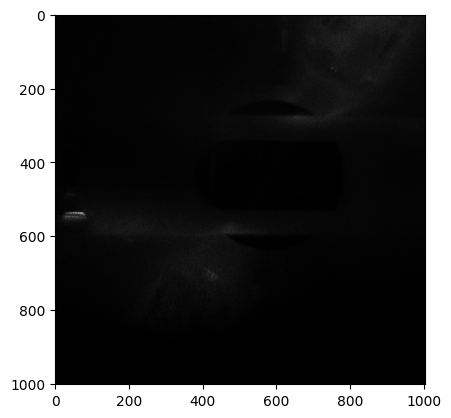

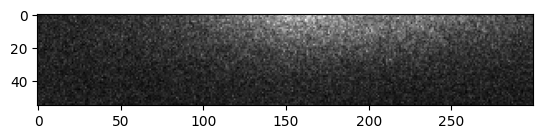

In [85]:
plt.imshow(mot3_arr[0], cmap='grey')
plt.show()
plt.imshow(mot3_arr[0,280:335,500:800], cmap='grey')

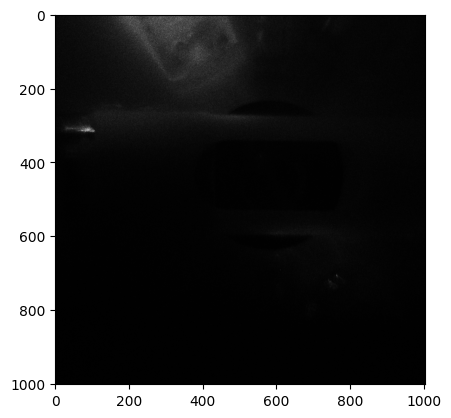

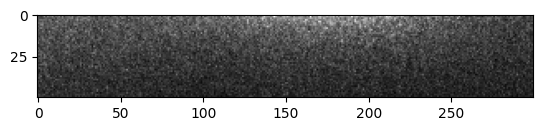

In [99]:
plt.imshow(mot4_arr[0], cmap='grey')
plt.show()
plt.imshow(mot4_arr[0,280:330,300:600], cmap='grey')

### compare MOT position and ROI scattering

In [152]:
# mot1_scatter = np.sum(mot1_arr[:,280:335,500:800],axis=(1,2))
# mot2_scatter = np.sum(mot1_arr[:,540:595,500:800],axis=(1,2))
# mot3_scatter = np.sum(mot1_arr[:,280:335,500:800],axis=(1,2))
# mot4_scatter = np.sum(mot1_arr[:,280:330,300:600],axis=(1,2))


mot1_before_roi = np.sum(mot1_arr[:,750:850,300:400],axis=(1,2))
mot2_before_roi = np.sum(mot2_arr[:,80:130,370:400],axis=(1,2))
mot3_before_roi = np.sum(mot3_arr[:,80:130,750:800],axis=(1,2))
mot4_before_roi = np.sum(mot4_arr[:,:100,250:300],axis=(1,2))

mot1_after_roi = np.sum(mot1_arr[:,280:335,500:800],axis=(1,2))
mot2_after_roi = np.sum(mot2_arr[:,540:595,500:800],axis=(1,2))
mot3_after_roi = np.sum(mot3_arr[:,280:335,500:800],axis=(1,2))
mot4_after_roi = np.sum(mot4_arr[:,280:330,300:600],axis=(1,2))

normalize_to_mean = lambda x: x/np.mean(x)

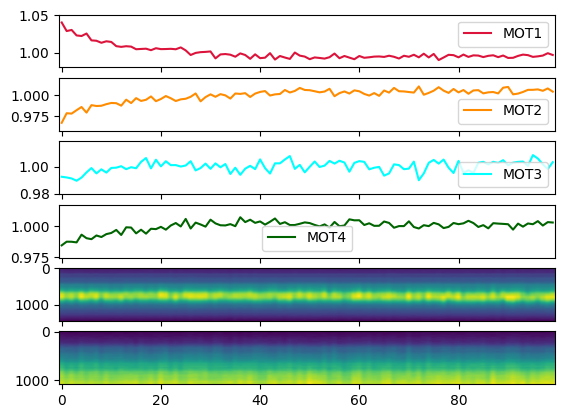

In [178]:
# plotting with each roi normalized to its own mean over all frames

mot1_scatter = normalize_to_mean(mot1_after_roi)/normalize_to_mean(mot1_before_roi)
mot2_scatter = normalize_to_mean(mot2_after_roi)/normalize_to_mean(mot2_before_roi)
mot3_scatter = normalize_to_mean(mot3_after_roi)/normalize_to_mean(mot3_before_roi)
mot4_scatter = normalize_to_mean(mot4_after_roi)/normalize_to_mean(mot4_before_roi)

mot_scatter_list = [mot1_scatter,mot2_scatter,mot3_scatter,mot4_scatter]

fig,axes = plt.subplots(nrows=6,sharex=True)
labels=['MOT1','MOT2','MOT3','MOT4']
colors=['crimson','darkorange','cyan','darkgreen','magenta','blue']
for scatter,lbl,ax,color in zip(mot_scatter_list,labels,axes.flat[:4],colors):
    ax.plot(scatter, label=lbl,color=color)
    ax.set_ylim((.99*min(scatter),1.01*max(scatter)))
axes[4].imshow(motx_slices,label="MOT x")#plot((xmax_list-xmax_list[0])/200, label="MOT x maximum",color=colors[4])
axes[4].set_aspect('auto')
axes[5].imshow(moty_slices,label="MOT y")#plot((ymax_list-ymax_list[0])/1000, label="MOT y maximum",color=colors[5])
axes[5].set_aspect('auto')
for ax in axes[:4]:
    ax.legend()

In [213]:
'dds_AOM_A3'[3:]

'_AOM_A3'

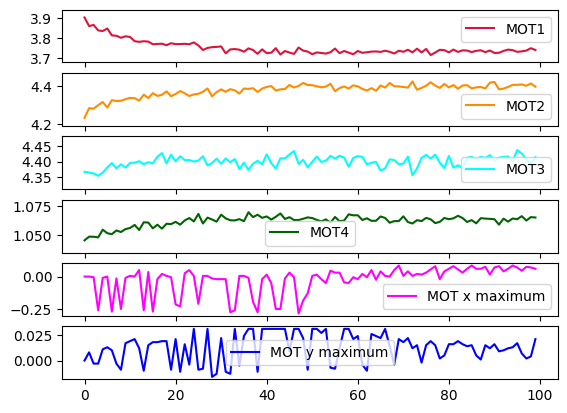

In [165]:
# plotting with each roi normalized to its own mean over all frames

mot1_scatter = mot1_after_roi/mot1_before_roi
mot2_scatter = mot2_after_roi/mot2_before_roi
mot3_scatter = mot3_after_roi/mot3_before_roi
mot4_scatter = mot4_after_roi/mot4_before_roi

mot_scatter_list = [mot1_scatter,mot2_scatter,mot3_scatter,mot4_scatter]

fig,axes = plt.subplots(nrows=6)
labels=['MOT1','MOT2','MOT3','MOT4']
colors=['crimson','darkorange','cyan','darkgreen','magenta','blue']
for scatter,lbl,ax,color in zip(mot_scatter_list,labels,axes.flat[:4],colors):
    ax.plot(scatter, label=lbl,color=color)
    ax.set_ylim((.99*min(scatter),1.01*max(scatter)))
axes[4].plot((xmax_list-xmax_list[0])/200, label="MOT x maximum",color=colors[4])
axes[5].plot((ymax_list-ymax_list[0])/1000, label="MOT y maximum",color=colors[5])
for ax in axes:
    ax.legend()